


## Job Title Classification using Decision Tree
### Is the job slot for a Data Analyst? 

Dataset [here](https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor)

About the dataset (Kaggle dataset page description):

*This dataset contains job postings from Glassdoor.com from 2017 with the following features It can be used to analyze the current trends based on job positions, company size, etc.*

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image, display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
import itertools
from sklearn.metrics import roc_curve, auc

In [2]:
#View of the dataset
#I'll use only 'salary_data_cleaned' dataset as it provides all I need

salary = pd.read_csv('salary_data_cleaned.csv')

For this part, I'll have to fix column index issues in salary_data_cleaned DataFrame

In [3]:
salary.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [4]:
salary.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [5]:
salary.set_index('Id',inplace=True)

In [6]:
salary.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
Id,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1


#### Removing columns and rows

In [7]:
#There is a boolean column in salary DataFrame that indicates whether the salary is paid hourly 

salary['hourly'].value_counts()

0    718
1     24
Name: hourly, dtype: int64

In [8]:
salary.query('hourly == 1')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
Id,,,,,,,,,,,,,,,,,,,,,
165,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,...,20.5,Tower Health\n,PA,0,3,0,0,0,0,0
177,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,27.5,Beebe Healthcare\n,DE,1,85,0,0,0,0,0
197,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,...,21.5,Texas Health Huguley Hospital\n,TX,0,43,0,0,0,1,0
202,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,27.5,Beebe Healthcare\n,DE,0,85,0,0,0,0,0
210,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,...,20.0,"Veterans Affairs, Veterans Health Administrati...",LA,0,90,0,0,0,0,0
246,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,...,20.5,Tower Health\n,PA,0,3,0,0,0,0,0
271,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,27.5,Beebe Healthcare\n,DE,1,85,0,0,0,0,0
337,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,...,21.5,Texas Health Huguley Hospital\n,TX,0,43,0,0,0,1,0
345,Clinical Laboratory Scientist,$24-$39 Per Hour(Glassdoor est.),POSITION PURPOSE:\nPerforms CLIA moderate and ...,3.7,Vail Health\n3.7,"Vail, CO","Vail, CO",501 to 1000 employees,1966,Hospital,...,31.5,Vail Health\n,CO,1,54,0,0,0,0,0


In [9]:
salary.shape

(742, 28)

In [10]:
#As the rows where hourly == 1 is not substantial, I'll drop them
salary.drop(salary[salary['hourly'] == 1].index,inplace=True)

In [11]:
salary.shape

(718, 28)

In [12]:
#Removing columns that won't be necessary to my model

salary.drop(columns=['Job Description','Rating','Location','Company Name','Headquarters','Founded',
                     'Competitors','hourly','company_txt','same_state','Salary Estimate','employer_provided','job_state','min_salary', 'max_salary']
            ,inplace=True)

In [13]:
salary.columns

Index(['Job Title', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'avg_salary', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel'],
      dtype='object')

In [14]:
#Check missing values
salary.isna().sum()

Job Title            0
Size                 0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
avg_salary           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
dtype: int64

In [15]:
#Check empty strings
#len(string.strip())
(salary.values == ' ').sum()

0

#### Exploring the dataset

In [16]:
#Basic info
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          718 non-null    object 
 1   Size               718 non-null    object 
 2   Type of ownership  718 non-null    object 
 3   Industry           718 non-null    object 
 4   Sector             718 non-null    object 
 5   Revenue            718 non-null    object 
 6   avg_salary         718 non-null    float64
 7   age                718 non-null    int64  
 8   python_yn          718 non-null    int64  
 9   R_yn               718 non-null    int64  
 10  spark              718 non-null    int64  
 11  aws                718 non-null    int64  
 12  excel              718 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 78.5+ KB


In [17]:
salary['Revenue'].value_counts()

Unknown / Non-Applicable            197
$10+ billion (USD)                  122
$100 to $500 million (USD)           82
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            42
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               37
$10 to $25 million (USD)             31
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: Revenue, dtype: int64

The "-1" value doesn't mean that the Revenue was negative, but, instead, that the data point is missing

I'll replace it to "Unknown / Non-Applicable"

In [18]:
salary['Revenue'] = salary['Revenue'].replace('-1','Unknown / Non-Applicable')

In [19]:
#Value Counts after replacement
salary['Revenue'].value_counts()

Unknown / Non-Applicable            198
$10+ billion (USD)                  122
$100 to $500 million (USD)           82
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            42
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               37
$10 to $25 million (USD)             31
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [20]:
salary['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Scientist 2, QC Viral Vector         1
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 254, dtype: int64

In [21]:
#Check duplicates
salary['duplicated'] = salary.duplicated()
salary['duplicated']

Id
0      False
1      False
2      False
3      False
4      False
       ...  
737     True
738     True
739     True
740     True
741     True
Name: duplicated, Length: 718, dtype: bool

In [22]:
salary['duplicated'].loc[salary['duplicated'] == True]

Id
29     True
30     True
58     True
59     True
86     True
       ... 
737    True
738    True
739    True
740    True
741    True
Name: duplicated, Length: 262, dtype: bool

The number of duplicates is quite substantial. It might be because the company resposted the job slot lots of times

In [23]:
#Drop the duplicates
salary.drop_duplicates()

,Job Title,Size,Type of ownership,Industry,Sector,Revenue,avg_salary,age,python_yn,R_yn,spark,aws,excel,duplicated
Id,,,,,,,,,,,,,,
0,Data Scientist,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),72.0,47,1,0,0,0,1,False
1,Healthcare Data Scientist,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),87.5,36,1,0,0,0,0,False
2,Data Scientist,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),85.0,10,1,0,1,0,1,False
3,Data Scientist,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),76.5,55,1,0,0,0,0,False
4,Data Scientist,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,114.5,22,1,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,"Principal, Data Science - Advanced Analytics",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),111.5,3,0,0,0,0,0,True
737,"Sr Scientist, Immuno-Oncology - Oncology",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),84.5,190,0,0,0,1,0,True
738,Senior Data Engineer,1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),102.5,14,1,0,1,1,0,True


There are SEVERAL job titles there. I'll have to create a classification for the types I want to target: Data Scientist

In [24]:
salary['Data Scientist'] = salary['Job Title'].str.contains('Data Scientist', case = False, regex = False).replace({True:1,False:0})

In [25]:
salary[['Job Title','Data Scientist']].loc[salary['Data Scientist'] == 1]

,Job Title,Data Scientist
Id,,
0,Data Scientist,1
1,Healthcare Data Scientist,1
2,Data Scientist,1
3,Data Scientist,1
4,Data Scientist,1
...,...,...
700,Data Scientist,1
702,Senior Data Scientist - R&D Oncology,1
707,Senior Data Scientist,1


In [26]:
#Now, I can drop Job Title
salary.drop(columns=['Job Title'],inplace = True)

In [27]:
#Probably, there are other variables that have "-1" value

salary['avg_salary'].loc[salary['avg_salary'] == '-1'].count()

0

In [28]:
salary['Size'].value_counts()

1001 to 5000 employees     140
501 to 1000 employees      131
10000+ employees           127
201 to 500 employees       117
51 to 200 employees         93
5001 to 10000 employees     72
1 to 50 employees           28
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [29]:
#Replace "-1" to Unknown
salary['Size'] = salary['Size'].replace('-1','Unknown')

In [30]:
salary['Type of ownership'].value_counts()

Company - Private                 406
Company - Public                  191
Nonprofit Organization             45
Subsidiary or Business Segment     34
Government                         14
College / University               13
Hospital                            8
Other Organization                  3
School / School District            2
Unknown                             1
-1                                  1
Name: Type of ownership, dtype: int64

In [31]:
salary['Type of ownership'] = salary['Type of ownership'].replace('-1','Unknown')

In [32]:
#Also, I don't need the "duplicated" column anymore
salary.drop(columns=['duplicated'],inplace=True)

In [33]:
salary.columns

Index(['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'avg_salary', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'Data Scientist'],
      dtype='object')

#### EDA

In [34]:
salary['Data Scientist'].value_counts()

0    439
1    279
Name: Data Scientist, dtype: int64

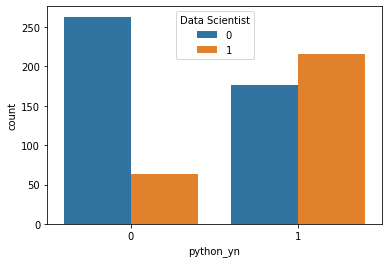

In [35]:
#I want to take a look on how some features relate with job titles that contain Data Analyst

sns.countplot(data=salary, x='python_yn',hue='Data Scientist');

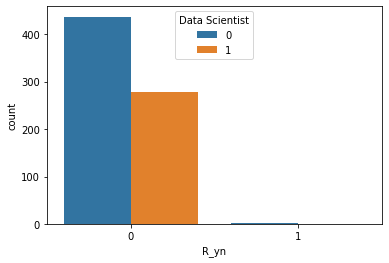

In [36]:
sns.countplot(data=salary, x='R_yn',hue='Data Scientist');

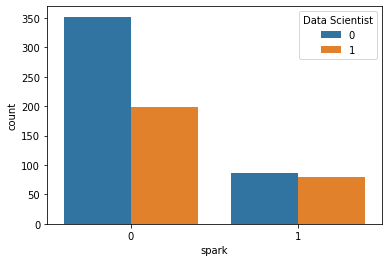

In [37]:
sns.countplot(data=salary, x='spark',hue='Data Scientist');

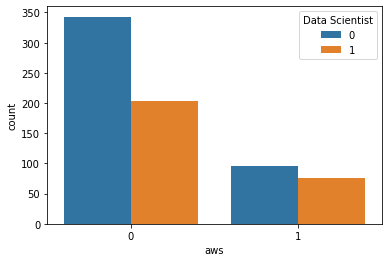

In [38]:
sns.countplot(data=salary, x='aws',hue='Data Scientist');

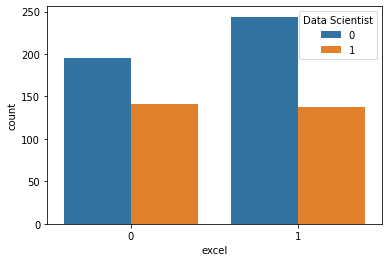

In [39]:
sns.countplot(data=salary, x='excel',hue='Data Scientist');

##### Categorial features conversion

In [40]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Size               718 non-null    object 
 1   Type of ownership  718 non-null    object 
 2   Industry           718 non-null    object 
 3   Sector             718 non-null    object 
 4   Revenue            718 non-null    object 
 5   avg_salary         718 non-null    float64
 6   age                718 non-null    int64  
 7   python_yn          718 non-null    int64  
 8   R_yn               718 non-null    int64  
 9   spark              718 non-null    int64  
 10  aws                718 non-null    int64  
 11  excel              718 non-null    int64  
 12  Data Scientist     718 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 94.7+ KB


As Decision Trees work properly with numerical variables, I have to convert the categorical features into numerical

For Size and Revenue, I'll use a LabelEncoding workaround, whereas for Type of Ownership, Industry and Sector, I'll use One-Hot Encoding 

###### LabelEncoding Workaround



First, an explanation: 

I have to employ a "LabelEncoding workaround", because the variables Size and Revenue have an order, which could be a use case for the traditional LabelEncoding.

However, scikit-learn LabelEncoder method orders string values alphabetically, which won't work properly for my features

So, I have to use a different method to create a correct ranking



In [41]:
#Starting with Size
salary.Size.value_counts()

1001 to 5000 employees     140
501 to 1000 employees      131
10000+ employees           127
201 to 500 employees       117
51 to 200 employees         93
5001 to 10000 employees     72
1 to 50 employees           28
Unknown                     10
Name: Size, dtype: int64

In [42]:
#The code below set an ascending index to each value of the Size feature
salary['Size_Encoded'] = salary['Size'].apply(lambda x:['Unknown','1 to 50 employees','51 to 200 employees','201 to 500 employees',
                                                        '501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees',
                                                        '10000+ employees'].index(x))

In [43]:
salary[['Size_Encoded','Size']].value_counts().sort_index()

Size_Encoded  Size                   
0             Unknown                     10
1             1 to 50 employees           28
2             51 to 200 employees         93
3             201 to 500 employees       117
4             501 to 1000 employees      131
5             1001 to 5000 employees     140
6             5001 to 10000 employees     72
7             10000+ employees           127
dtype: int64

In [44]:
#Same for Revenue
salary.Revenue.value_counts()

Unknown / Non-Applicable            198
$10+ billion (USD)                  122
$100 to $500 million (USD)           82
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            42
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               37
$10 to $25 million (USD)             31
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [45]:
salary['Revenue_Encoded'] = salary['Revenue'].apply(lambda x:['Unknown / Non-Applicable','Less than $1 million (USD)','$1 to $5 million (USD)',
                                                              '$5 to $10 million (USD)','$10 to $25 million (USD)','$25 to $50 million (USD)',
                                                              '$50 to $100 million (USD)','$100 to $500 million (USD)','$500 million to $1 billion (USD)',
                                                              '$1 to $2 billion (USD)','$2 to $5 billion (USD)','$5 to $10 billion (USD)',
                                                              '$10+ billion (USD)'].index(x))

In [46]:
salary[['Revenue_Encoded','Revenue']].value_counts().sort_index()

Revenue_Encoded  Revenue                         
0                Unknown / Non-Applicable            198
1                Less than $1 million (USD)            4
2                $1 to $5 million (USD)                8
3                $5 to $10 million (USD)              18
4                $10 to $25 million (USD)             31
5                $25 to $50 million (USD)             40
6                $50 to $100 million (USD)            42
7                $100 to $500 million (USD)           82
8                $500 million to $1 billion (USD)     57
9                $1 to $2 billion (USD)               60
10               $2 to $5 billion (USD)               37
11               $5 to $10 billion (USD)              19
12               $10+ billion (USD)                  122
dtype: int64

###### One-Hot Encoding

In [47]:
new_salary = pd.get_dummies(salary,columns=['Type of ownership','Industry','Sector'],drop_first=True)
new_salary

,Size,Revenue,avg_salary,age,python_yn,R_yn,spark,aws,excel,Data Scientist,...,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism
Id,,,,,,,,,,,,,,,,,,,,,
0,501 to 1000 employees,$50 to $100 million (USD),72.0,47,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10000+ employees,$2 to $5 billion (USD),87.5,36,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,501 to 1000 employees,$100 to $500 million (USD),85.0,10,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1001 to 5000 employees,$500 million to $1 billion (USD),76.5,55,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,51 to 200 employees,Unknown / Non-Applicable,114.5,22,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,10000+ employees,$10+ billion (USD),84.5,190,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
738,1001 to 5000 employees,$100 to $500 million (USD),102.5,14,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
739,501 to 1000 employees,Unknown / Non-Applicable,73.5,36,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##### Index correction

In [48]:
#As I dropped lots of rows at the beginning, I'll reindex the dataframe
new_index = np.arange(0,719,1)
new_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [49]:
pd.set_option('display.max_columns', 500)

In [50]:
new_salary.reindex(new_index)

,Size,Revenue,avg_salary,age,python_yn,R_yn,spark,aws,excel,Data Scientist,Size_Encoded,Revenue_Encoded,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,501 to 1000 employees,$50 to $100 million (USD),72.0,47.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10000+ employees,$2 to $5 billion (USD),87.5,36.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,501 to 1000 employees,$100 to $500 million (USD),85.0,10.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

#### Training

Time to train the data

[Important reference](https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde) 

In [51]:
new_salary.drop(columns=['Size','Revenue'],inplace=True)

In [52]:
X = new_salary.drop(columns='Data Scientist')
Y = new_salary['Data Scientist']

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [54]:
#Instance the classifier
model = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [55]:
#Train the model
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

#### Display the Decision Tree

In [56]:
export_graphviz(model,out_file='decision_tree.dot',feature_names=X.columns,rounded=True,filled=True,class_names=['Not Data Scientist','Data Scientist'])

In [57]:
!dot -Tpng decision_tree.dot -o decision_tree.png

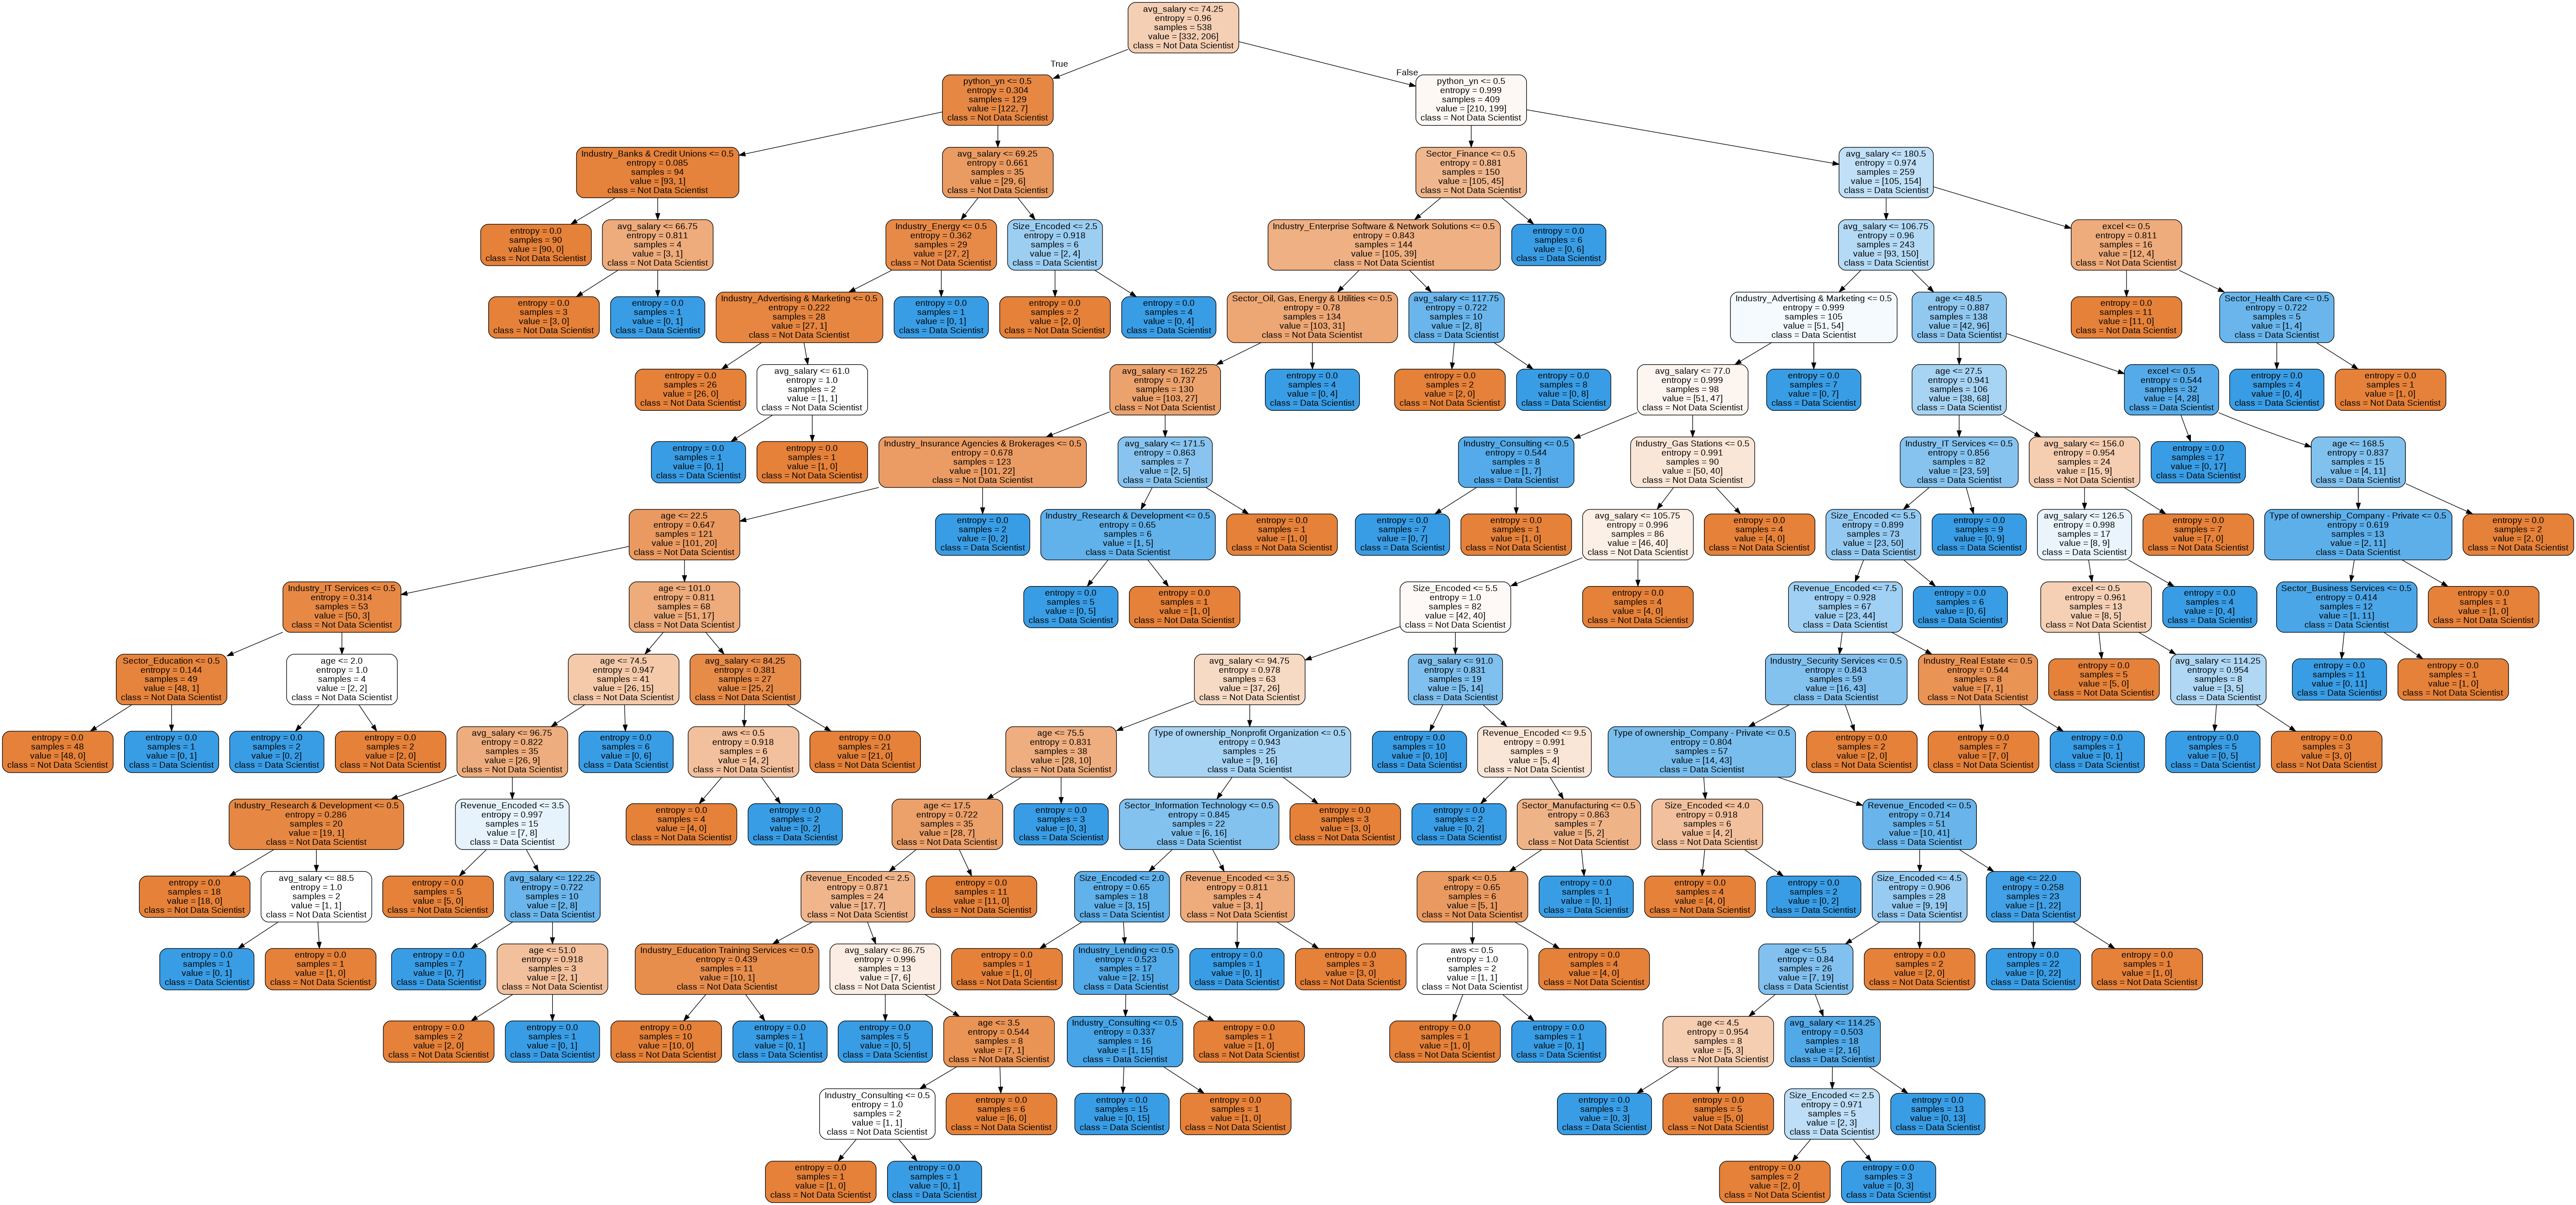

In [58]:
display(Image('decision_tree.png',width=1900,unconfined=True))

#### Model Evaluation

In [59]:
Y_pred = model.predict(X_test)

In [60]:
Y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1])

In [61]:
Y_probs = model.predict_proba(X_test)

In [62]:
#Accuracy score
print(f'From all the predictions, the model got {(accuracy_score(Y_test,Y_pred).round(4))*100}% correctly')

From all the predictions, the model got 85.0% correctly


In [63]:
#Classification report
print(classification_report(Y_test, Y_pred, target_names=['Not Data Scientist','Data Scientist']))

                    precision    recall  f1-score   support

Not Data Scientist       0.84      0.93      0.88       107
    Data Scientist       0.87      0.74      0.80        73

          accuracy                           0.85       180
         macro avg       0.85      0.83      0.84       180
      weighted avg       0.85      0.85      0.85       180



#### Interpretability

In [64]:
!pip install git+https://github.com/slundberg/shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/slundberg/shap to /tmp/pip-req-build-y965nyy9
  Running command git clone -q https://github.com/slundberg/shap /tmp/pip-req-build-y965nyy9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.41.0-cp38-cp38-linux_x86_64.whl size=2724762 sha256=18755b1fe3cde9d9ba1e8df0f5e27c6095f883717cc3d5bff6df40a5a7bef0cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-ynke6h9m/wheels/2b/f2/d8/61ef04f4a69661bd0bbe251dc4cb28cfc832bb782f04c2eea4
Successfully built shap


In [65]:
import shap

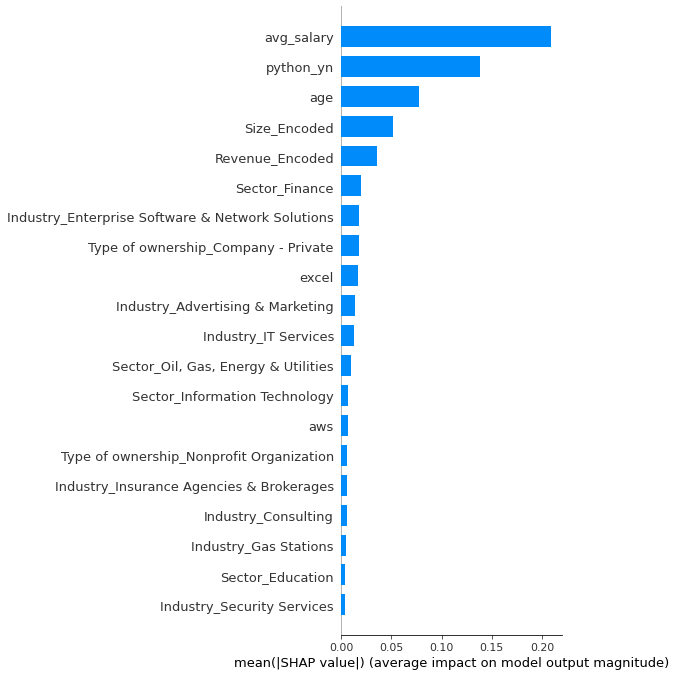

In [66]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1],X_train,plot_type='bar')

From the chart above, it seems that the minimun salary was the most important variable to determine if the job slot is for Data Scientist was the Average Salary